# LAB-02: Giới thiệu về Python, OpenCV & Numpy

### Mục tiêu: Mục tiêu của bài thực hành này là giới thiệu cho sinh viên về OpenCV, đặc biệt là liên quan đến xử lý ảnh.

Một số lệnh hữu ích:

1. Để tạo một mảng 2D gồm các số không sử dụng NumPy:

    - `my_array = numpy.zeros((số_dòng, số_cột))`
2. Để tạo một mảng 2D gồm các số một sử dụng NumPy:

    - `my_array = numpy.ones((số_dòng, số_cột))`
3. Để kiểm tra kích thước của mảng 2D:

    - `size = numpy.shape(my_array)`
4. Đọc một hình ảnh bằng OpenCV:

    - `my_image = cv2.imread("test_image.jpg", 0)`
    - Tham số thứ hai quyết định liệu hình ảnh được đọc dưới dạng ảnh xám hay ảnh màu. 0 được sử dụng để đọc hình ảnh dưới dạng ảnh xám, trong khi 1 được sử dụng để đọc hình ảnh màu. Nếu không truyền tham số nào thì hình ảnh được đọc như mặc định.

5. Hiển thị một hình ảnh bằng OpenCV:

    - `cv2.imshow("Tiêu đề cửa sổ", my_image)`
6. Hai lệnh nữa cần được sử dụng khi hiển thị hình ảnh là:

    - `cv2.waitKey(x)`
    - `cv2.destroyAllWindows()`
    - Hàm waitKey() chờ một phím được nhấn trong x mili giây. Nếu truyền 0 vào waitKey() như một tham số, nó sẽ chờ vô thời hạn cho đến khi một phím được nhấn. cv2.destroyAllWindows() đóng tất cả các cửa sổ hình ảnh đang mở.

7. Ghi một hình ảnh ra đĩa:

    - `cv2.imwrite("image_name.jpg", my_image)`
8. Thay đổi kích thước một hình ảnh:

    - `cv2.resize(my_image, (chiều_cao_mới, chiều_rộng_mới))`







### Bài tập 1:

    - Đọc bất kỳ hình ảnh nào mà bạn muốn bằng lệnh phù hợp và hiển thị nó.



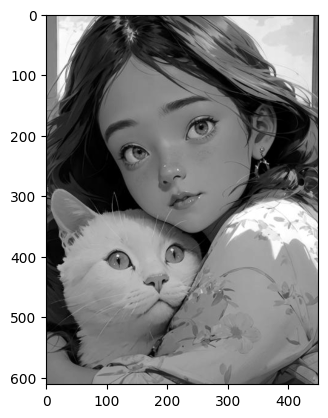

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

path_img = r'D:\Image-Proccessing\pratice\week_1\img\00750.jpeg'

# read image
img = cv2.imread(path_img, 0)
plt.imshow(img, cmap='gray')


### Bài tập 2:

    - a) Bây giờ hãy phản chiếu hình ảnh mà bạn đã đọc tại trung tâm, tức là nửa dưới của hình ảnh sẽ là bản sao của nửa trên. (GỢI Ý: Bạn có thể sử dụng các vòng lặp lồng nhau). Ghi hình ảnh vào đĩa bằng lệnh phù hợp.


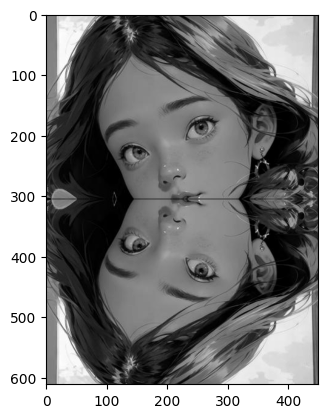

In [3]:
w, h = img.shape
mask = np.zeros((w, h), np.uint8)

for i in range(w//2):
    for j in range(h):
        mask[i,j] = img[i,j]
        mask[w-i-1, j] = img[i,j]

plt.imshow(mask, cmap='gray')


    - b) Bây giờ hoàn toàn lật ngược hình ảnh để nó bị đảo ngược từ trên xuống dưới như hình dưới đây:



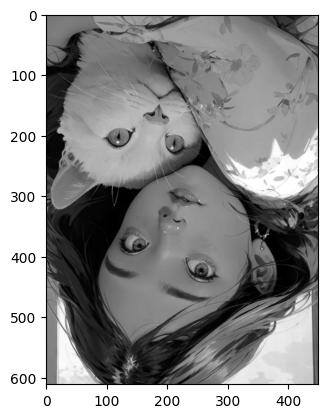

In [4]:
w,h = img.shape
mask = np.zeros((w,h), np.uint8)
for i in range(w):
    for j in range(h):
        mask[w-i-1,j] = img[i,j]
plt.imshow(mask, cmap='gray')

### Bài tập 3:

    - Tạo một ma trận kích thước r×c gồm các số một và thêm viền gồm các số không rộng 10 pixel xung quanh mỗi cạnh của nó, sao cho kích thước của nó sẽ trở thành (4+500+4)×(4+500+4)=508×508 như hình dưới đây:

    - Tạo một hàm tổng quát sao cho các giá trị (500 và 4) có thể được người dùng truyền vào.



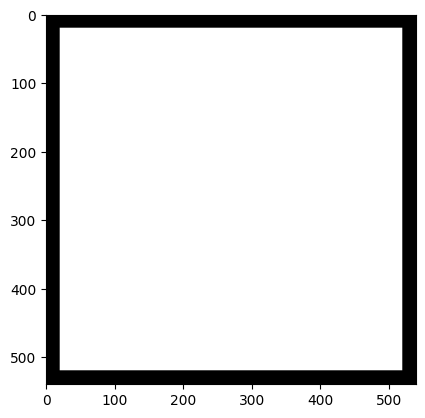

In [5]:
def lab3(matrix_size,pad_size):
    matrix = np.ones((matrix_size,matrix_size), np.uint8)
    padded_matrix = np.pad(matrix, pad_size, mode='constant', constant_values=0)
    

    plt.imshow(padded_matrix, cmap='gray')
lab3(500,20)

### Bài tập 4:

    - Viết 3 hàm Python khác nhau có thể tạo ra các hình ảnh được cho dưới đây. Lập trình chúng sao cho kích thước của hình ảnh và các hộp và đường kẻ có thể được thay đổi.



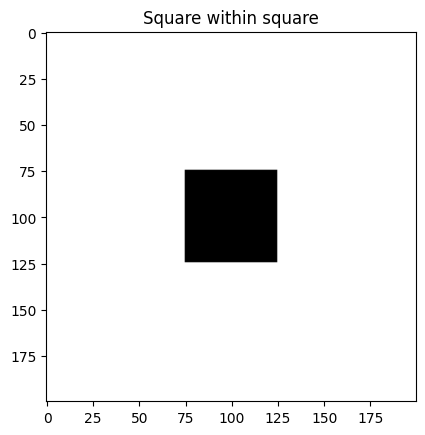

In [6]:
def draw_square_within_square(image_size=100, inner_size=30):
    # Tạo hình ảnh toàn màu trắng
    img = np.ones((image_size, image_size), dtype=np.uint8) * 255
    
    # Tạo hình vuông bên trong (ở giữa)
    start = (image_size - inner_size) // 2
    img[start:start+inner_size, start:start+inner_size] = 0  # Hình vuông đen ở giữa
    
    # Hiển thị hình ảnh
    plt.imshow(img, cmap='gray')
    plt.title('Square within square')
    plt.show()

draw_square_within_square(200, 50)

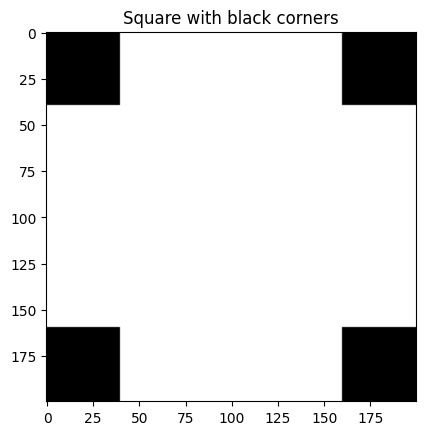

In [7]:
def draw_square_with_black_corners(image_size=100, corner_size=20):
    # Tạo hình ảnh toàn màu trắng
    img = np.ones((image_size, image_size), dtype=np.uint8) * 255
    
    # Vẽ các góc màu đen
    img[:corner_size, :corner_size] = 0  # Góc trên-trái
    img[:corner_size, -corner_size:] = 0  # Góc trên-phải
    img[-corner_size:, :corner_size] = 0  # Góc dưới-trái
    img[-corner_size:, -corner_size:] = 0  # Góc dưới-phải
    
    # Hiển thị hình ảnh
    plt.imshow(img, cmap='gray')
    plt.title('Square with black corners')
    plt.show()

# Ví dụ sử dụng
draw_square_with_black_corners(200, 40)


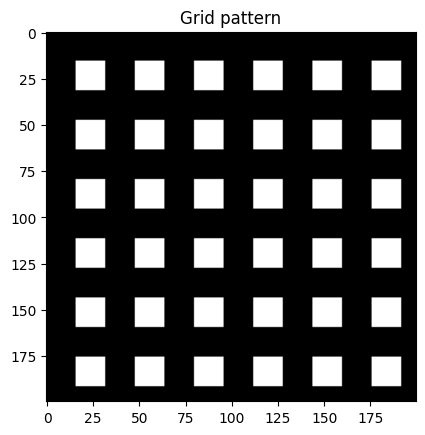

In [8]:
def draw_grid(image_size=200, num_lines=5):
    # Tạo hình ảnh toàn màu trắng
    img = np.ones((image_size, image_size), dtype=np.uint8) * 255
    
    # Độ dày của các đường lưới
    line_thickness = image_size // (num_lines * 2)
    
    # Vẽ các dòng dọc và ngang để tạo lưới
    for i in range(0, image_size, 2 * line_thickness):
        img[i:i + line_thickness, :] = 0  # Các dòng ngang
        img[:, i:i + line_thickness] = 0  # Các dòng dọc
    
    # Hiển thị hình ảnh
    plt.imshow(img, cmap='gray')
    plt.title('Grid pattern')
    plt.show()

# Ví dụ sử dụng
draw_grid(200, 6)


### Bài tập 5:

    - Đọc một hình ảnh và thay đổi kích thước của nó thành 512×512 bằng hàm thích hợp. Sau đó giảm mẫu hình ảnh xuống 4 lần sao cho kích thước cuối cùng của hình ảnh là 128×128. Hiển thị và lưu hình ảnh vào đĩa.



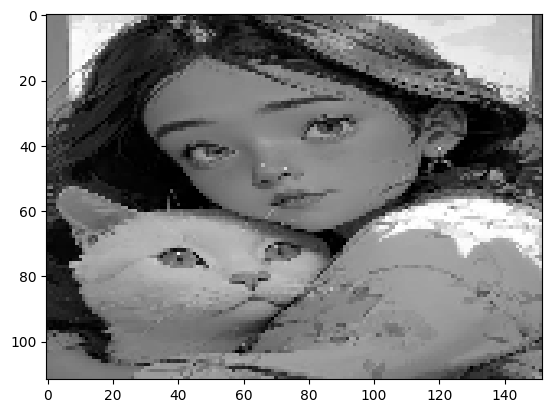

In [9]:
# Gimả kích thước của hình ảnh xuống 4 lần
def downsample_image(image, factor=4):
    # Lấy kích thước mới của hình ảnh
    new_shape = (image.shape[0] // factor, image.shape[1] // factor)
    
    # Thực hiện việc giảm mẫu
    downsampled_image = cv2.resize(image, new_shape, interpolation=cv2.INTER_NEAREST)
    
    return downsampled_image

plt.imshow(downsample_image(img, 4), cmap='gray')

### Bài tập 6:

    - Viết một hàm để tạo một hình ảnh màu trắng kích thước 500×500 (hoặc bất kỳ kích thước nào khác do người dùng nhập vào) và sau đó tạo 4 hộp màu Đỏ, Xanh Lá, Xanh Dương và Đen tương ứng ở mỗi góc của hình ảnh như hình dưới đây.

    - Kích thước của các hộp màu nên bằng 1/8 kích thước của hình ảnh. (GỢI Ý: các mảng gồm các số một và số không có thể có hơn 2 chiều).

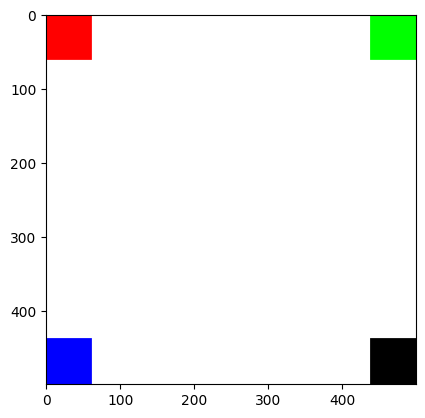

In [10]:
# Hàm để tạo hình ảnh với 4 ô màu ở các góc
def create_image_with_colored_corners(image_size=500):
    # Tạo một hình ảnh trắng (3 kênh màu R,G,B, mỗi kênh đều là 255)
    img = np.ones((image_size, image_size, 3), dtype=np.uint8) * 255

    # Kích thước của mỗi ô vuông màu
    box_size = image_size // 8

    # Vẽ ô màu đỏ (góc trên-trái)
    img[:box_size, :box_size] = [255, 0, 0]  # Red (R=255, G=0, B=0)

    # Vẽ ô màu xanh lá (góc trên-phải)
    img[:box_size, -box_size:] = [0, 255, 0]  # Green (R=0, G=255, B=0)

    # Vẽ ô màu xanh dương (góc dưới-trái)
    img[-box_size:, :box_size] = [0, 0, 255]  # Blue (R=0, G=0, B=255)

    # Vẽ ô màu đen (góc dưới-phải)
    img[-box_size:, -box_size:] = [0, 0, 0]  # Black (R=0, G=0, B=0)

    # Hiển thị hình ảnh
    plt.imshow(img)


# Ví dụ sử dụng
create_image_with_colored_corners(500)